### Kmeans

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,[3,4]].values

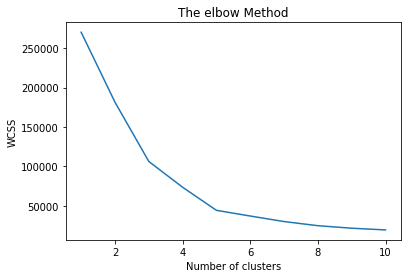

In [16]:
# Now find out optimal no. of clusters  -> elbow method

from sklearn.cluster import KMeans

wcss = []     # wcss - with in cluster sum of squares , used to create elbow method
for i in range(1,11):     # range used for K value or cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)    # Here we only use : fit
    wcss.append(kmeans.inertia_)  # inertia : to give wcss value of each and every cluster as the for lop goes.
    
plt.plot(range(1,11), wcss)   # Now plotting elbow , plot based on value 1 to 10
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()              # Now we can see in plot , elbow at 5 showing wcss , we use no. of cluster = 5

In [20]:
# Now create model of KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)  # Now we know cluster=5
y_kmeans = kmeans.fit_predict(X)    # predict X values based on that divide into clusters 

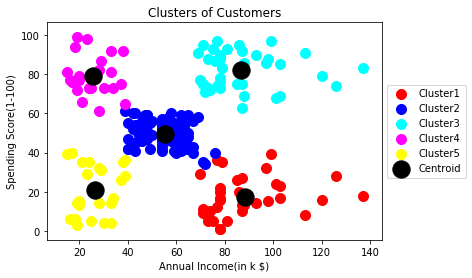

In [25]:
# Now after model we visualize clusters         # In X we have 2 var. so it goes for index-> 0 , 1

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster1' )
# (x-var, y-var.) : (x-var :> for clusters 0 (we have 5 clusters 0 to 4), 0th index of X data) (y-var :> 0 cluster, 1st index X)
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster2' )       # s - pixels size
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='cyan', label='Cluster3' )
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='magenta', label='Cluster4' )
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='yellow', label='Cluster5' )


# Now display the Centroid of each clusters    , # cluster-centers : to findout the clusters of clustering part
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', label='Centroid')   
# for 0th, 1st index of X , s- pixels high to display clearly , 

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(in k $)')
plt.ylabel('Spending Score(1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))     # placing legend out of the plot
plt.show()

## ---------------------------------------------------------------------------------------

Using another dataset

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


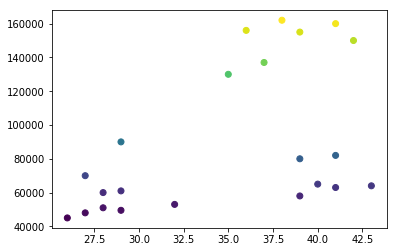

In [5]:
plt.scatter(df['Age'],df['Income($)'], c=df['Income($)'])

In [6]:
km = KMeans(n_clusters=3)     # no. of clusters
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
y_predicted = km.fit_predict(df[['Age','Income($)']])           # directly fit and predict , excluding - Name column
y_predicted                                               # shows culster created like 0,1,2

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['cluster'] = y_predicted      # adding new column : cluster to df
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


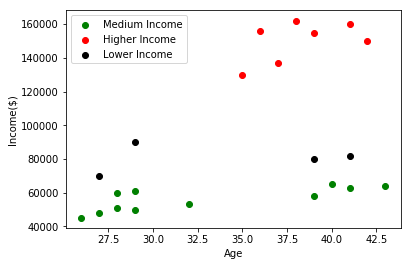

In [11]:
# Now separating 3 cluster into 3 different DF

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color='green',label='Medium Income')          # give labels after checking in graph 1st
plt.scatter(df1['Age'],df1['Income($)'],color='red',label='Higher Income')
plt.scatter(df2['Age'],df2['Income($)'],color='black',label='Lower Income')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

like here we stuck with green and black clustering its not good, so we use: MinMaxScaler

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])   # so my scaler try to make the scale 0 to 1 (on both y as well as x-axis )
df['Income($)'] = scaler.transform(df[['Income($)']])   # scaler will scale the Income feature

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])       # Age will also be scaled
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
# Again using KMeans algorithm to train our scale dataset 

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [15]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [16]:
km.cluster_centers_           # these centers are centroids basically

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

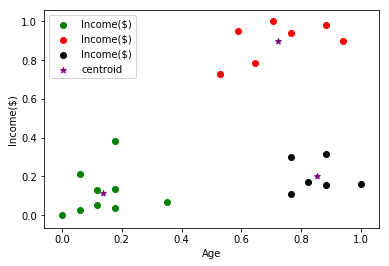

In [17]:
df0 = df[df.cluster==0]             # Now see good cluster here
df1 = df[df.cluster==1]
df2 = df[df.cluster==2] 

plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='black')

# placing centroids , [:0] for x-axis means all rows and 1st column , [:,1] fory-axis    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')


plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

## -----------------------------------

### Elbow method 
##### to find the value of  'k'

In [18]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)                # inertia will give : sse

In [19]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009398,
 0.16858512236029757,
 0.1397684499538816,
 0.10824862283029266]

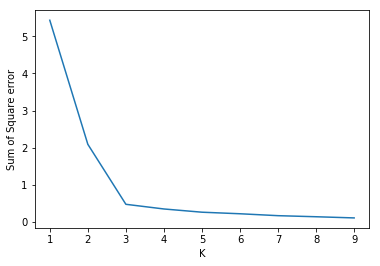

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of Square error')
plt.plot(k_rng,sse)                    # Here we can see in plot, we get at k=3, so we use no of cluster=3 